In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

In [14]:
np.random.seed(200)  # Seed the random number generator for reproducible results

In [20]:
# Location, scale and weight for the two distributions
dist1_loc, dist1_scale, weight1 = -1, 0.5, 0.25
dist2_loc, dist2_scale, weight2 = 1, 0.5, 0.75

# Sample from a mixture of distributions
obs_dist = mixture_rvs(
    prob=[weight1, weight2],
    size=250,
    dist=[stats.norm, stats.norm],
    kwargs=(
        dict(loc=dist1_loc, scale=dist1_scale),
        dict(loc=dist2_loc, scale=dist2_scale),
    ),
)

print(obs_dist)

[-1.6541477   1.7872469   1.41224154 -1.04787271  0.29889467  0.52471125
  1.42234013 -0.49347565  0.62181197  0.96099019  1.90089413  1.34524149
 -1.60791186  0.48632664  1.67307193  1.48533711 -1.4159375  -1.06340286
  1.05992766  0.18592769  0.57370676  1.01934752 -0.98633688 -0.70288795
  0.38729707 -1.50414038 -1.71430772  0.33948615  1.13463354  1.43567137
  0.54192611  0.89835094 -1.63781824  0.63603918 -1.44181457  1.5916728
 -0.91343713  1.30399187 -1.11918666  1.93925947  0.54989373  1.70214183
  0.60210296  1.51361354  0.71388767  0.54862608 -1.22926105  1.5151787
  1.62661295  0.78468717  0.96462325  0.42138068  0.6019373   1.14095065
  2.37796883  0.27164918  1.56629716  1.08416862 -0.72640287 -0.06968519
  1.34472648 -0.65534387 -0.19224731  0.7362261   0.78009365  1.74255724
  1.0924942   1.25507016  0.82094601 -1.2218672   0.17779401  0.83803401
  1.40319283  1.37170782 -1.64058682 -1.95420627 -1.94429145 -0.44883598
 -1.65389032  1.59234566  2.13462044  1.60461775  1.0

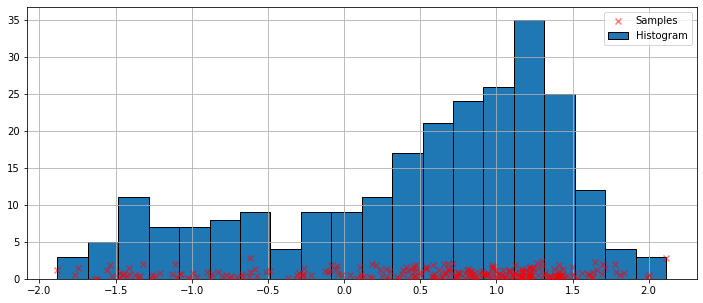

In [16]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Scatter plot of data samples and histogram
ax.scatter(
    obs_dist,
    np.abs(np.random.randn(obs_dist.size)),
    zorder=15,
    color="red",
    marker="x",
    alpha=0.5,
    label="Samples",
)
lines = ax.hist(obs_dist, bins=20, edgecolor="k", label="Histogram")

ax.legend(loc="best")
ax.grid(True, zorder=-5)

In [ ]:
kde = sm.nonparametric.KDEUnivariate(obs_dist)
kde.fit()  # Estimate the densities

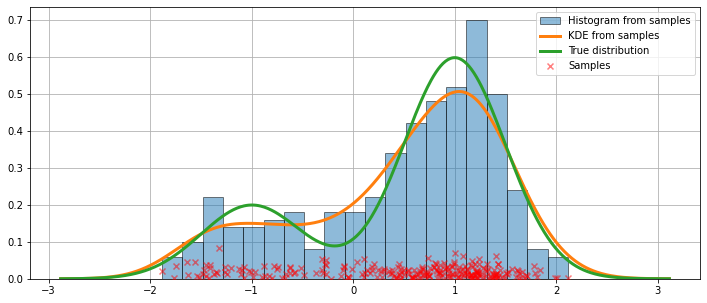

In [18]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Plot the histrogram
ax.hist(
    obs_dist,
    bins=20,
    density=True,
    label="Histogram from samples",
    zorder=5,
    edgecolor="k",
    alpha=0.5,
)

# Plot the KDE as fitted using the default arguments
ax.plot(kde.support, kde.density, lw=3, label="KDE from samples", zorder=10)

# Plot the true distribution
true_values = (
    stats.norm.pdf(loc=dist1_loc, scale=dist1_scale, x=kde.support) * weight1
    + stats.norm.pdf(loc=dist2_loc, scale=dist2_scale, x=kde.support) * weight2
)
ax.plot(kde.support, true_values, lw=3, label="True distribution", zorder=15)

# Plot the samples
ax.scatter(
    obs_dist,
    np.abs(np.random.randn(obs_dist.size)) / 40,
    marker="x",
    color="red",
    zorder=20,
    label="Samples",
    alpha=0.5,
)

ax.legend(loc="best")
ax.grid(True, zorder=-5)


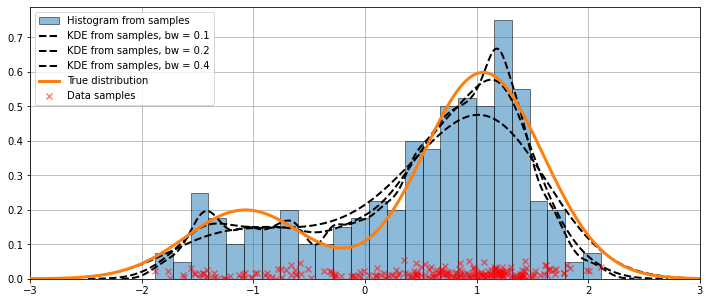

In [19]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Plot the histrogram
ax.hist(
    obs_dist,
    bins=25,
    label="Histogram from samples",
    zorder=5,
    edgecolor="k",
    density=True,
    alpha=0.5,
)

# Plot the KDE for various bandwidths
for bandwidth in [0.1, 0.2, 0.4]:
    kde.fit(bw=bandwidth)  # Estimate the densities
    ax.plot(
        kde.support,
        kde.density,
        "--",
        lw=2,
        color="k",
        zorder=10,
        label="KDE from samples, bw = {}".format(round(bandwidth, 2)),
    )

# Plot the true distribution
ax.plot(kde.support, true_values, lw=3, label="True distribution", zorder=15)

# Plot the samples
ax.scatter(
    obs_dist,
    np.abs(np.random.randn(obs_dist.size)) / 50,
    marker="x",
    color="red",
    zorder=20,
    label="Data samples",
    alpha=0.5,
)

ax.legend(loc="best")
ax.set_xlim([-3, 3])
ax.grid(True, zorder=-5)